# Prueba 2 Analizado los crímenes en la Ciudad de Nueva York
### Abril - 2021

Integrantes:

        - Iván Hernández
        - Sebastián Soto 

## 1.- Preliminares

#### Contexto:

Los datos son recogidos del departamente de policía de New York. Contiene información sobre detención y interogación del departamente durante los períodos 2009(entrenamiento) y 2010(prueba).

Para cumplir con el objetivo es necesario procesar la información de la siguientes etapas, tomar en consideración de que esta gradiente tiene movilidad y se pueden producir cambios a través del flujo.

#### Etapa 1: Enmarcar el problema 
**¿Cuál es el objetivo del problema?**
Tiene como finalidad reportar la siguiente información al lector:
- La probabilidad que un individuos sea arrestado en uno de los cinco barrios, teniendo como condicional el género y raza
- Generar 3 modelos que sean capaces de predecir si e producira un arrresto o no 

#### Etapa 2: Adquirir y preparar los datos 
- 2. Aspectos computacionales: 
    - Importe de libreria: Se importa la libreria necesaria para poder desarrollar la problematica.
    - Importe de datos y procesamiento de la muestra.

#### Etapa 3: Explorar los datos  
**Visualización de datos**
- 3.  Analisis exploratorio:
     - Descripción de los atributos: Se describe el tipo de atributo, la distribución de categorias. 
     - Gráfico de histograma para la visualización de la frecuencia del atributo.
     - Inspección del vector objetivo con variables independientes tales como, sector, sexo y raza.

#### Etapa 4: Modelizar y evaluar los datos 
- 4.  Feature Engieneering:
     - Binarización
     - División de la muestra:  Se procede a dividir la data en las variables de entrenamiento y de prueba condicionada a los respectivos vectores objetivos 

**Modelos a utilizar**

**Evaluación de los modelos**
#### Etapa 5:Comunicar los resultados 


-----------

## 2.- Aspectos computacionales

### 1.- Importe de librerias clásicas para el procesamiento,visualizaciones y modelación de los datos

- Numpy: Da soporte para crear vectores y matrices grandes multidimensionales para el procesamiento de la data.
- Pandas: Da soporte para la manipulación y análisis de datos.
- Marplotlib: Generación y representación gráfico de los datos.  
- Seaborn: Generación y representación gráfico de los datos.
- Sklearn: Biblioteca de software de aprendizaje automático para la generación de modelos, grillas y métricas. 

In [82]:
# Importe de librerias clásicas para el procesamiento y visualizaciones de los datos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis exploratiorio
import missingno as msg

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Grilla de búsqueda de mejores hiperparámetros y separador de muestras de validacion y testeo.
from sklearn.model_selection import GridSearchCV, train_test_split

# Para estandarizar los atributos
from sklearn.preprocessing import StandardScaler

# Métricas
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score

# Para plotear roc curve
from plot_metric.functions import BinaryClassification

# Oversampling
from imblearn.over_sampling import SMOTE

# Pickle
import pickle

# Para un notebook más limpio ignoré los errores de deprecación que salían en algunos gráficos de seaborn
import warnings
warnings.filterwarnings("ignore")

#Funciones creadas 
import funciones
import preproc_nyc_sqf as preproc
import lec10_graficos as afx

### Importe de datos y análisis exploratorio de estos

Se importan los datos del año 2009 y 2010. Contamos inicialmente con un total de 111 columnas, de ellas debemos identificar cuantos elementos se encuentran sin información, para ello se aplica condión "nan" para asi poder identificar los atributos que no existe información, y asi tomar la decisión de eliminar los atributos que nos dan ruido al análisis posterior. 
Debe existir una concordancia entre los dataset de entrenamiento y prueba por lo mismo los atributos deben ser los mismos. 
Por último se agrega la condición un atributo de condición de la muestra. 

In [5]:
# Base de datos 2009 (entrenamiento)
df= pd.read_csv("2009_1perc.csv").drop(columns="Unnamed: 0")
# Base de datos 2010 (prueba) 
df_2= pd.read_csv("2010_1perc.csv").drop(columns="Unnamed: 0")

In [6]:
pd.set_option('display.max_columns', 111)

In [7]:
df.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,2,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,41,41,N,N,,,M,B,7111984,24,5,9,145,BK,BR,M,,L,,,STREET,957,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,,BRONX,,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,5,P,Y,Y,N,,N,,0,0,N,,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,N,N,108,108,Y,N,V,S,M,A,12151993,15,5,5,140,BK,BR,T,,L,,,STREET,,,63 STREET,37 AVENUE,,QUEENS,,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,1,V,Y,N,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,43,43,Y,N,,S,M,Q,7031987,21,6,3,220,BR,BR,M,,L,,,STREET,,,WATSON AVENUE,WHEELER AVENUE,,BRONX,,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,5,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,77,77,N,N,,,M,B,3131986,22,5,5,120,BK,BR,T,,L,,,STREET,249,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,,BROOKLYN,,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,10,P,Y,Y,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,110,110,Y,Y,,,M,Q,9221991,18,5,6,165,BK,BR,M,,L,,,SIDEWALK,,,53 AVENUE,108 STREET,,QUEENS,,,110,H,,,1024535,0209890,CM,1,20


In [8]:
df_na=df.replace(" ",np.nan)
df_na_2=df_2.replace(" ",np.nan)
df_na.isna().sum().sort_values(ascending = False)[:24]

othfeatr    5812
aptnum      5812
rescode     5812
premtype    5812
zip         5812
state       5812
officrid    5727
arstoffn    5464
sumoffen    5456
post        5268
offverb     4559
offshld     4205
beat        3622
addrnum     3300
stname      3225
premname     591
trhsloc      205
xcoord       168
ycoord       168
sector       116
stinter       40
crossst       40
radio          0
knifcuti       0
dtype: int64

In [9]:
df_na_2.isna().sum().sort_values(ascending = False)[:24]

othfeatr    6013
rescode     6013
premtype    6013
aptnum      6013
state       6013
zip         6013
officrid    5937
arstoffn    5614
sumoffen    5567
post        5383
offverb     4687
offshld     4370
beat        3822
addrnum     3561
stname      3468
premname     625
xcoord       249
ycoord       249
sector       173
stinter       71
crossst       70
linecm         1
detailcm       1
dettypcm       1
dtype: int64

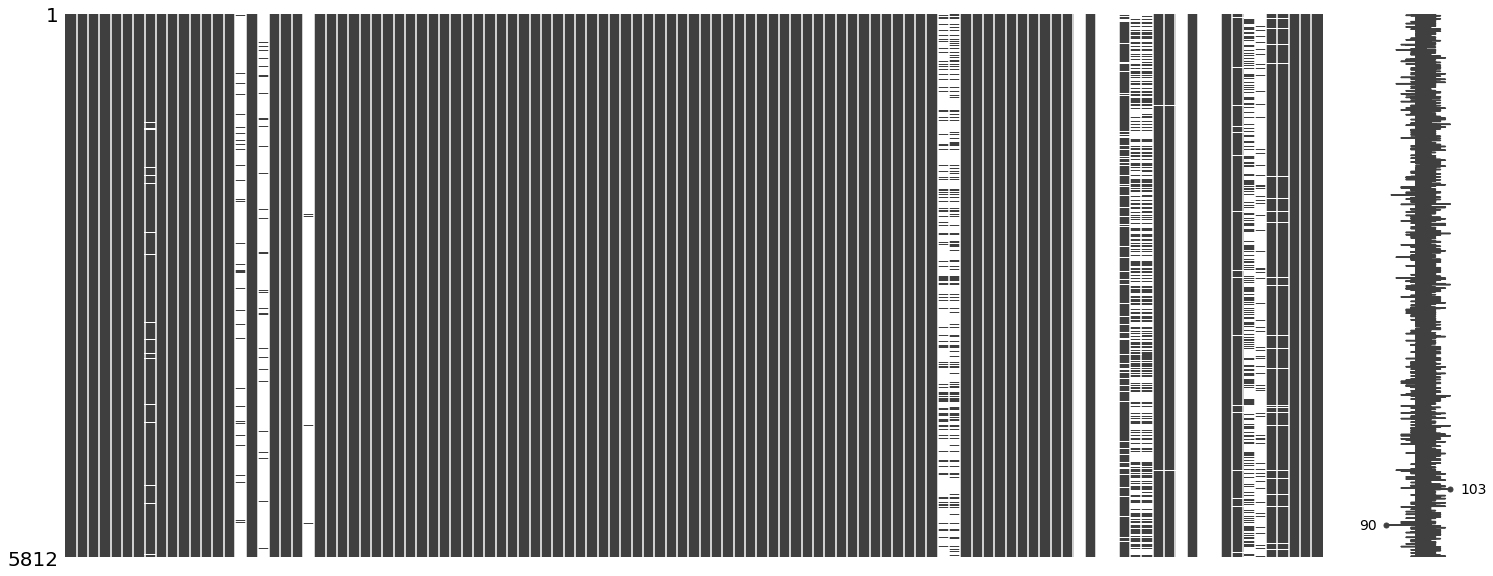

In [10]:
msg.matrix(df_na)

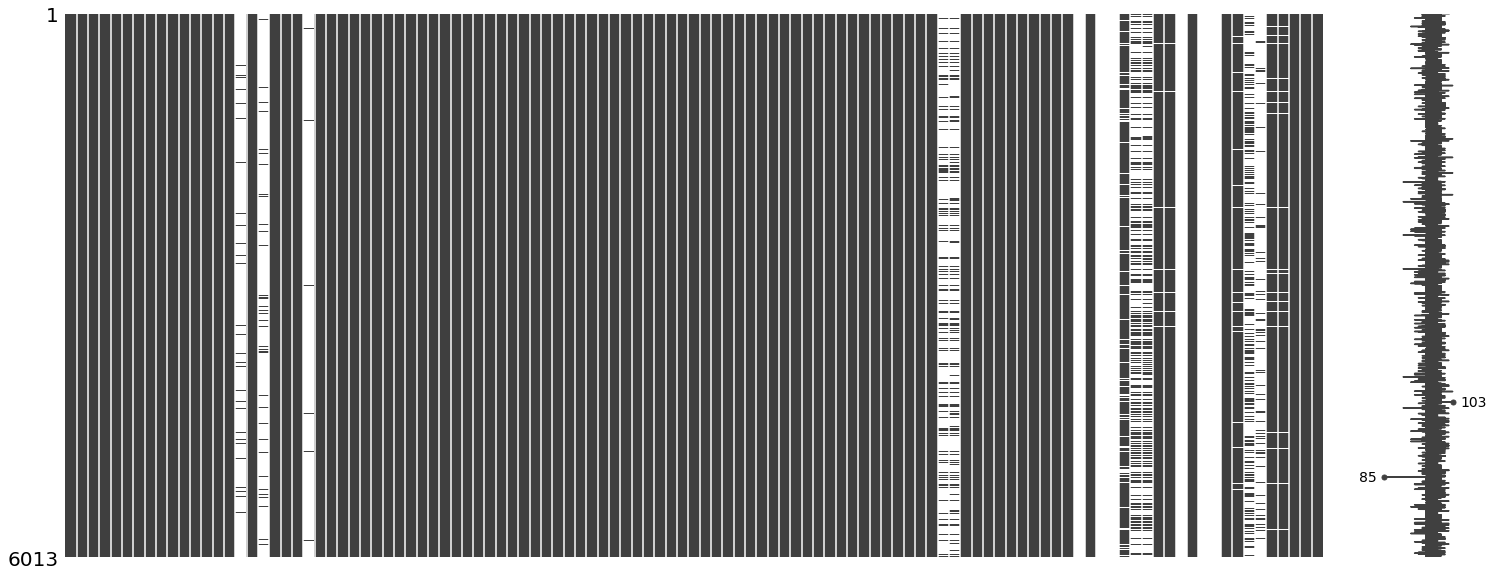

In [11]:
msg.matrix(df_na_2)

In [12]:
print("Atributos de Test:")
df_train, _, _ = preproc.create_suitable_dataframe(df)
print("Dimensión de Test\nNº de filas: {}, Nº de columnas: {}\n".format(df_train.shape[0],df_train.shape[1]))

print("Atributos de Train:")
df_test, _, _ = preproc.create_suitable_dataframe(df_2)
print("Dimensión de Test\nNº de filas: {}, Nº de columnas: {}\n".format(df_test.shape[0],df_test.shape[1]))

Atributos de Test:
['perobs']
Dimensión de Test
Nº de filas: 4636, Nº de columnas: 74

Atributos de Train:
[]
Dimensión de Test
Nº de filas: 4747, Nº de columnas: 77



- Podemos apreciar que existe una diferencia en la cantidad de atributos, por lo cual se procede verificación de los atributos en cada dataset, con la función `set` se procede a convalidacion.

In [13]:
df_train = df_train.drop(columns=(set(df_train.columns) - set(df_test.columns)))
print("Dimensión de Test\nNº de filas: {}, Nº de columnas: {}\n".format(df_train.shape[0],df_train.shape[1]))

df_test= df_test.drop(columns=(set(df_test.columns) - set(df_train.columns)))
print("Dimensión de Train\nNº de filas: {}, Nº de columnas: {}".format(df_test.shape[0],df_test.shape[1]))

Dimensión de Test
Nº de filas: 4636, Nº de columnas: 72

Dimensión de Train
Nº de filas: 4747, Nº de columnas: 72


In [14]:
df_train["muestra"]="train"
df_test["muestra"]="test"
df_final = pd.concat(objs=[df_train, df_test])
print("Nº de filas: {}, Nº de columnas: {}".format(df_final.shape[0],df_final.shape[1]))

Nº de filas: 9383, Nº de columnas: 73


-----

## 3.- Análisis exploratorio 

In [15]:
discription(df_final)

Para la variable: recstat
A    5677
1    3706
Name: recstat, dtype: int64

Para la variable: inout
O    7174
I    2209
Name: inout, dtype: int64

Para la variable: trhsloc
P    7027
H    1440
T     747
U     169
Name: trhsloc, dtype: int64

Para la variable: typeofid
P    5574
V    3522
R     158
O     129
Name: typeofid, dtype: int64

Para la variable: explnstp
Y    9372
N      11
Name: explnstp, dtype: int64

Para la variable: othpers
N    7726
Y    1657
Name: othpers, dtype: int64

Para la variable: arstmade
N    8793
Y     590
Name: arstmade, dtype: int64

Para la variable: sumissue
N    8701
Y     682
Name: sumissue, dtype: int64

Para la variable: offunif
Y    6729
N    2654
Name: offunif, dtype: int64

Para la variable: officrid
N    9251
Y     132
Name: officrid, dtype: int64

Para la variable: frisked
Y    5150
N    4233
Name: frisked, dtype: int64

Para la variable: searched
N    8574
Y     809
Name: searched, dtype: int64

Para la variable: contrabn
N    9222
Y     161
Name:

### Análisis decriptivo de todos los atributos

<Figure size 1080x2880 with 0 Axes>

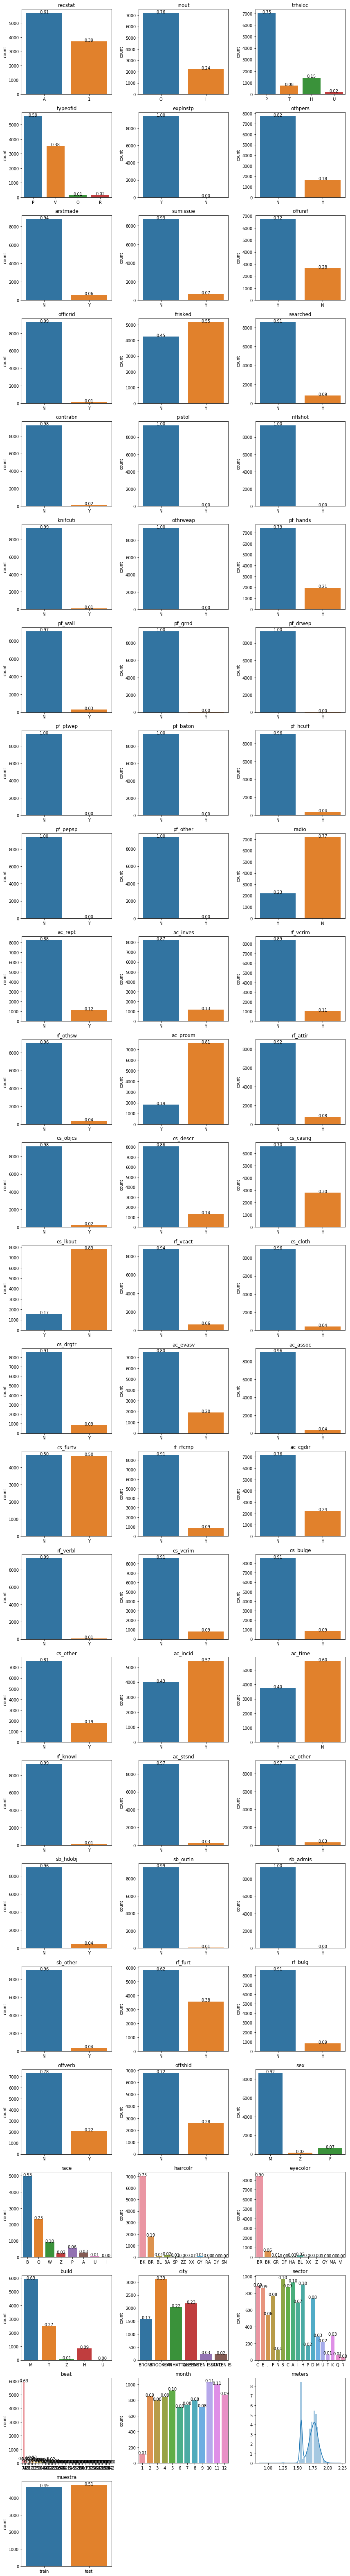

In [16]:
plt.figure(figsize=(15,40))
distribution_plots(df_final)

**Conclusiones**:
   - Al visualizar los atributos nos podemos darnos cuenta de que los siguientes atributos se encuentran bastante desbalanceados ["explnstp" , "offcrid", "contrabn","pistol","riflshot", "knicuti","othweap", "pf_wall", pf_grnd","pf_drwep","pf_ptwep","pf_baton","pf_pepsp",pf_other","rf_verbl","rf_knowl","sb_admis"].  Son condicionantes en las cuales se deben agrupar en respuesta a parámetros establecidos en Feature engineering. 
   - El atributo `beat` se muestra que el 63% de ellos se encuntra desconocido por lo cual también será sacado de la muestra por tener un porcentaje sustancial de datos desconocidos.
   - Nuestro vector objetivo "arstmode" presenta un desbalnce en donde sólo el 6% fue arrestada

### Analisis de atributos de comportamiento del vector objetivo "arstmode"

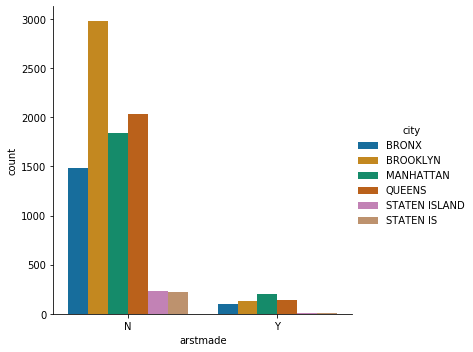

In [17]:
sns.catplot(data = df_final, x = "arstmade", hue = "city", kind = "count", palette = "colorblind")

**Conclusiones de acuerdo a al sector**

       Podemos observar de forma demógrafica en dónde existe más casos de control son en Brooklin y de detenciones en Manhatan,Brooklyn, Queens.

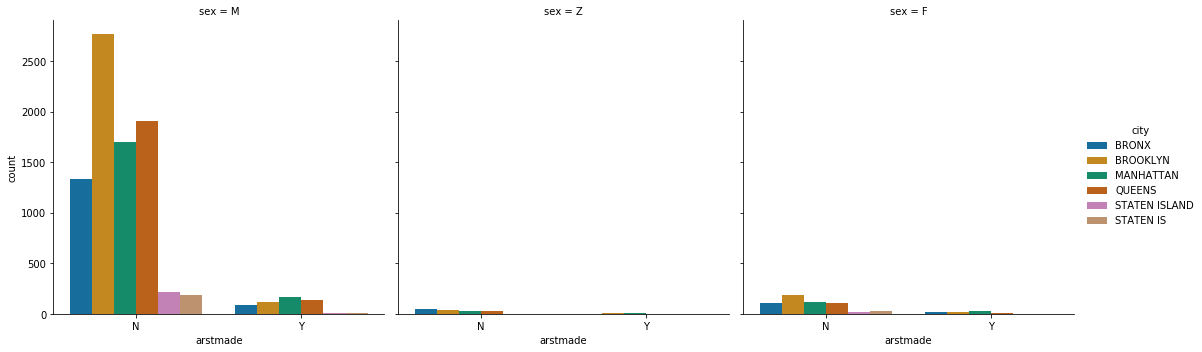

In [18]:
sns.catplot(data = df_final, x = "arstmade", hue = "city", col = "sex", kind = "count", palette = "colorblind")

**Conclusiones de acuerdo a al sector y el sexo**

   En el caso de la distrución por sexo, podemos inferir que las personas de sexo **MASCULINO** son considerablemente más controladas que el sexo **FEMENINO** al igual que la detenciones existentes. En ambos casos tanto control como detención es jeraquizada de la misma forma en cuanto a la localidad geográfica antes mencionada.

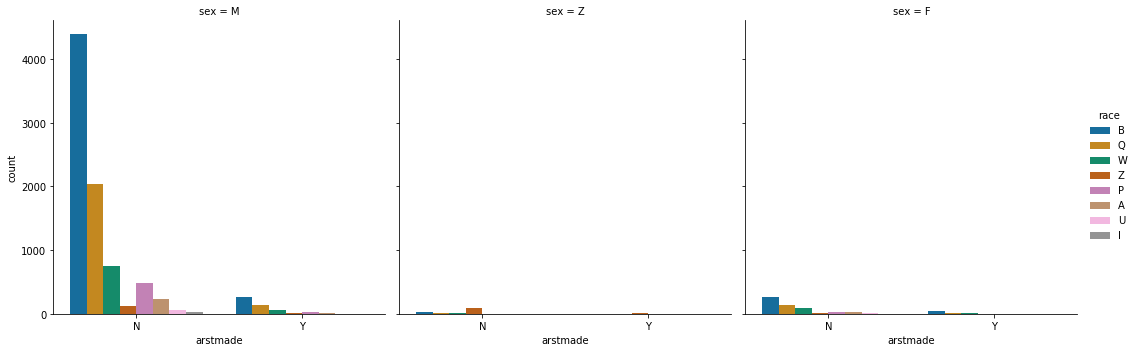

In [19]:
sns.catplot(data = df_final, x = "arstmade", hue = "race", col = "sex", kind = "count", palette = "colorblind")

**Conclusiones de acuerdo a al sector y la raza**

  - En total las personas **Negras** que son controladas y detenidas representan el 53% de la muestra y luego viene las personas de raza **Hispano blancos** con un 25% y muy posterior **Blancos** con un 9,6%
  - En el caso de las personas controladas en su gran mayoría son hombres de raza **Negra**, luego vienen los **Hispanos blancos** y después con gran diferencia los **Blancos** esta tencia cambia en el caso de las mujeres que en su mayoria son de la categoria **Otros**

--------

# 4. Feature Engieneering

En el caso de nuestro vector objetivo, debemos recodificar para asi identificar si hubo acciones violencia en el procedimiento.Para ello se creara un vector en donde si existe (YES) en los atribos **pf** se considera como violento.

In [20]:
df_final.head()

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,frisked,searched,contrabn,pistol,riflshot,knifcuti,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,offverb,offshld,sex,race,haircolr,eyecolor,build,city,sector,beat,month,meters,muestra
0,A,O,P,P,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,M,BRONX,G,7,4,1.798320,train
2,1,O,P,V,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,Y,M,Q,BR,BR,M,BRONX,E,U,10,1.920240,train
3,A,O,P,P,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,T,BROOKLYN,J,4,12,1.676400,train
5,1,I,T,V,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,Y,M,B,BK,BR,M,MANHATTAN,F,16,5,1.767840,train
6,1,O,P,P,Y,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,Y,Y,N,Y,Y,N,N,N,M,B,BK,BR,T,BROOKLYN,N,U,11,1.557528,train


In [21]:
df_final["violent_arrest"] = np.select([df_final["pf_hands"] == "Y", df_final["pf_wall"] == "Y", df_final["pf_grnd"]  == "Y", 
                                          df_final["pf_drwep"] == "Y" , df_final["pf_ptwep"] == "Y" , df_final["pf_baton"] == "Y",
                                          df_final["pf_hcuff"] == "Y" , df_final["pf_pepsp"] == "Y", df_final["pf_other"] == "Y"],
                                          [1, 1, 1, 1, 1, 1, 1, 1, 1], 0)

In [22]:
df_final=df_final.drop(columns =["pf_hands","pf_wall","pf_grnd","pf_drwep","pf_ptwep","pf_baton","pf_hcuff","pf_pepsp","pf_other","beat"])

In [23]:
print(df_final["violent_arrest"].value_counts("%"))

0    0.760844
1    0.239156
Name: violent_arrest, dtype: float64


**Conclusión**:
    puede inferir que los arrestados con violencia policial fueron el 23%

### 4.1 Proceso de binarización

In [24]:
var_cuantititativa=[]
var_cualitativo=[]

for colname,serie in df_final.iteritems():   
    if df_final[colname].dtype == "object":
        var_cualitativo.append(colname)
    else:
        var_cuantititativa.append(colname)

In [25]:
df_bin= bin(df_final,var_cualitativo)
df_bin

,month,meters,violent_arrest,recstat_1,inout_I,trhsloc_H,trhsloc_T,trhsloc_U,typeofid_O,typeofid_R,typeofid_V,explnstp_N,othpers_Y,arstmade_Y,sumissue_Y,offunif_N,officrid_Y,frisked_N,searched_Y,contrabn_Y,pistol_Y,riflshot_Y,knifcuti_Y,othrweap_Y,radio_Y,ac_rept_Y,ac_inves_Y,rf_vcrim_Y,rf_othsw_Y,ac_proxm_Y,rf_attir_Y,cs_objcs_Y,cs_descr_Y,cs_casng_Y,cs_lkout_Y,rf_vcact_Y,cs_cloth_Y,cs_drgtr_Y,ac_evasv_Y,ac_assoc_Y,cs_furtv_Y,rf_rfcmp_Y,ac_cgdir_Y,rf_verbl_Y,cs_vcrim_Y,cs_bulge_Y,cs_other_Y,ac_incid_N,ac_time_Y,rf_knowl_Y,ac_stsnd_Y,ac_other_Y,sb_hdobj_Y,sb_outln_Y,sb_admis_Y,...,sex_Z,race_A,race_I,race_P,race_Q,race_U,race_W,race_Z,haircolr_BA,haircolr_BL,haircolr_BR,haircolr_DY,haircolr_GY,haircolr_RA,haircolr_SN,haircolr_SP,haircolr_XX,haircolr_ZZ,eyecolor_BK,eyecolor_BL,eyecolor_DF,eyecolor_GR,eyecolor_GY,eyecolor_HA,eyecolor_MA,eyecolor_VI,eyecolor_XX,eyecolor_Z,build_H,build_T,build_U,build_Z,city_BRONX,city_MANHATTAN,city_QUEENS,city_STATEN IS,city_STATEN ISLAND,sector_A,sector_C,sector_D,sector_E,sector_F,sector_G,sector_H,sector_I,sector_J,sector_K,sector_M,sector_N,sector_P,sector_Q,sector_R,sector_T,sector_U,muestra_train
0,4,1.798320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,10,1.920240,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,12,1.676400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,5,1.767840,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6,11,1.557528,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,6,1.706880,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6008,9,1.554480,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6009,7,1.737360,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6011,11,1.557528,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Distribución final vectores objetivo para predicción de arrestos.

In [26]:
# Separando muestras de acuerdo a nuestros vectores objetivos para la data de entrenamiento
# Se hace este paso para plotear el vector objetivo y tener nuestras muestras de entrenamiento y validacion
df_train = df_bin.query("muestra_train==1")

X_train_arstmade = df_train.drop(columns = ["arstmade_Y","muestra_train"])
y_train_arstmade = df_train["arstmade_Y"]

X_train_violent = df_train.drop(columns = ["violent_arrest","muestra_train"])
y_train_violent = df_train["violent_arrest"]

#Separando muestras de acuerdo a nuestros vectores objetivos para la data de testeo
df_test = df_bin.query("muestra_train==0")

X_test_arstmade = df_test.drop(columns = ["arstmade_Y","muestra_train"])
y_test_arstmade = df_test["arstmade_Y"]

X_test_violent = df_test.drop(columns = ["violent_arrest","muestra_train"])
y_test_violent = df_test["violent_arrest"]

+ Vector objetivo para la prediccion si se efectuo un arresto.

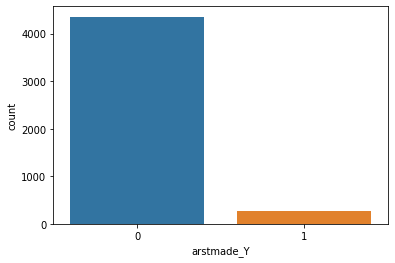

In [27]:
sns.countplot(df_train['arstmade_Y'])

+ Vector objetivo para la prediccion si hubo procedimiento violento.

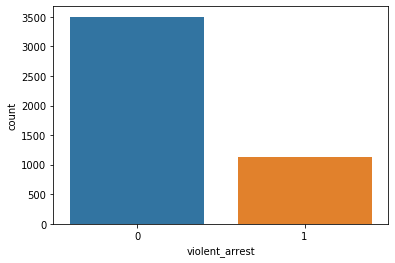

In [28]:
sns.countplot(df_train['violent_arrest'])

+ Podemos notar que las clases están desbalanceadas, para solucionar este problema, recurriremos a tecnicas de Oversample artificial. A continuación haremos uso en particular de la tecnica SMOTE.

#### SMOTE.

In [29]:
# Instanciamos el objeto que nos va a oversamplear la muestra
smt = SMOTE(sampling_strategy='minority', random_state=37311)
# Hacemos un fit para generar el oversampling en la data de entrenamiento
X_SMOTE_arst, y_SMOTE_arst = smt.fit_sample(X_train_arstmade, y_train_arstmade)
X_SMOTE_vlnt, y_SMOTE_vlnt = smt.fit_sample(X_train_violent, y_train_violent)

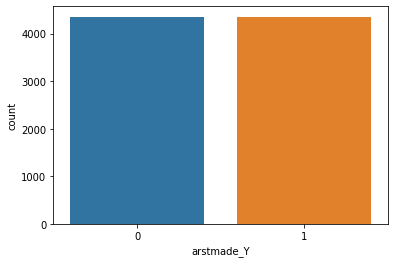

In [30]:
sns.countplot(y_SMOTE_arst)

+ Ahora podemos ver en nuestro primer vector objetivo que ya esta balanceado.

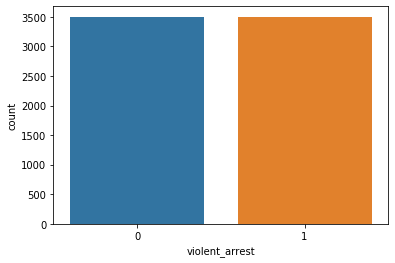

In [31]:
sns.countplot(y_SMOTE_vlnt)

+ Aquí en nuestro segundo vector objetivo, después del SMOTE, tambien se encuentra balanceado.

------------

## 5.- Modelación.

### 5.1.1 RandomForest.

In [32]:
# Preparación datos
# Instanciando objeto estandarizador
scaler = StandardScaler()
X_SMOTE_arst_scaled = scaler.fit_transform(X_SMOTE_arst)
X_SMOTE_vlnt_scaled = scaler.fit_transform(X_SMOTE_vlnt)

+ Entrenando modelo con busqueda en grilla de hiperparametros.


+ Esta grilla viene definida por:


{**max_features**: [None, 'log2', 'sqrt'], **n_estimators**:list(range(20,1001,50))}

In [33]:
random_forest_grid_cv = GridSearchCV(RandomForestClassifier(random_state = 37311), {'max_features': [None, 'log2', 'sqrt'],'n_estimators':list(range(20,1001,50))},n_jobs=-1).fit(X_SMOTE_arst_scaled, y_SMOTE_arst)

##### Metricas: Matriz de confusión, reporte de clasificación y curva ROC.

[[3684  754]
 [  92  217]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      4438
           1       0.22      0.70      0.34       309

    accuracy                           0.82      4747
   macro avg       0.60      0.77      0.62      4747
weighted avg       0.93      0.82      0.86      4747



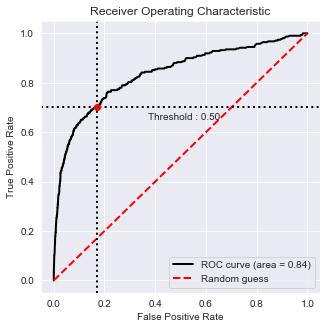

In [84]:
y_hat_arst_rf = random_forest_grid_cv.best_estimator_.predict(X_test_arstmade)
y_hat_arst_rf_proba = random_forest_grid_cv.predict_proba(X_test_arstmade)[::,1]
get_metrics(y_hat_arst_rf, y_test_arstmade, y_hat_arst_rf_proba)

+ De estas metricas podemos decir que este modelo capta de mejor manera cuando una persona No es arrestada vs que cuando Si es arrestada. Esto se puede apreciar en el recall 0.83 > 0.70
+ Este 0.70 no esta diciendo que nuestro modelo para esta clase (individuo arrestado) predice mejor que un clasificador aleatorio (0.70 > 0.5).

+ Del grafico podemos ver la recta negra esta por encima de la roja, esto nos dice que nuestro modelo en general es mejor que un clasificador aleatorio. Todo el area dentro de la curva puede interpretarse como la probabilidad de que ante un par de individuos, uno arrestado y el otro no arrestado, la prueba los clasifique correctamente.


+ Mejores hiperparametros que se encontrarón con la busqueda de grilla:

In [35]:
random_forest_grid_cv.best_params_

{'max_features': 'log2', 'n_estimators': 670}

### 5.1.2 SVM.

+ Definiendo grilla.

In [36]:
C =  [0.001, 0.01, 0.1, 1, 10]
gamma = [0.0001, 0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf']
cross_val_n = 2
param_dict = {'C':C,'gamma':gamma, 'kernel': kernel}

+ Entrenando modelo con busqueda en grilla de hiparametros.
+ Esta grilla viene definida por:


{**estimator**: SVC(kernel= rbf), **C**: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], **gamma**: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10], **cv**: 2 }

In [37]:
svm_model_grid_cv = GridSearchCV(estimator=SVC(probability=True), param_grid= param_dict, cv=cross_val_n, n_jobs=-1)
svm_model_grid_cv.fit(X_SMOTE_arst_scaled, y_SMOTE_arst)

GridSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [38]:
y_hat_arst_svm = svm_model_grid_cv.best_estimator_.predict(X_test_arstmade)
y_hat_arst_svm_proba = svm_model_grid_cv.best_estimator_.predict_proba(X_test_arstmade)[::,1]

##### Metricas: Matriz de confusión, reporte de clasificación y curva ROC.

[[4177  261]
 [ 150  159]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      4438
           1       0.38      0.51      0.44       309

    accuracy                           0.91      4747
   macro avg       0.67      0.73      0.69      4747
weighted avg       0.93      0.91      0.92      4747



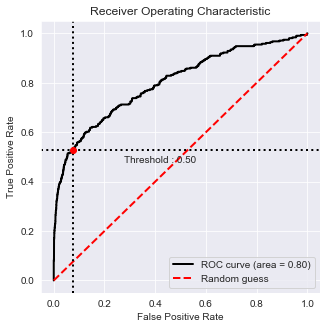

In [39]:
get_metrics(y_hat_arst_svm, y_test_arstmade, y_hat_arst_svm_proba)

+ De estas metricas podemos decir que este modelo capta de mejor manera cuando una persona No es arrestada vs que cuando Si es arrestada. Esto se puede apreciar en el recall 0.94 > 0.51
+ Este 0.51 no esta diciendo que nuestro modelo para esta clase (individuo arrestado) predice de manera similar a un clasificador aleatorio (0.51 ~ 0.5).

+ Del grafico podemos ver la recta negra esta por encima de la roja, esto nos dice que nuestro modelo en general es mejor que un clasificador aleatorio. Todo el area dentro de la curva puede interpretarse como la probabilidad de que ante un par de individuos, uno arrestado y el otro no arrestado, la prueba los clasifique correctamente.

Cabe decir que esta curva representa el ponderado de las metricas. Esto nos puede llevar a pensar que el modelo actúa de buena manera  para la predicción de las dos clases, pero por el reporte de clasificación tenemos que para una clase, el modelo actúa peor que un clasificador aleatorio.

+ Mejores hiperparametros que se encontrarón con la busqueda de grilla:

In [40]:
svm_model_grid_cv.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

### 5.1.3 LogisticRegression
- Esta grilla vino definida por:

 {**'C'**:[0.001, 0.01, 0.1, 0.5, 1, 1.5, 2], **'penalty'**: ['l2','l1', 'elasticnet']}



In [41]:
log_grid_param = {'C':[0.001, 0.01, 0.1, 0.5, 1, 1.5, 2], 'penalty': ['l2','l1', 'elasticnet']}

In [42]:
lr_model_arst_grid_cv = GridSearchCV(estimator=LogisticRegression(), param_grid = log_grid_param, cv=2, n_jobs=-1)
lr_model_arst_grid_cv.fit(X_SMOTE_arst_scaled, y_SMOTE_arst)

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [43]:
y_hat_arst_lr = lr_model_arst_grid_cv.predict(X_test_arstmade)
y_hat_arst_lr_proba = lr_model_arst_grid_cv.predict_proba(X_test_arstmade)[::,1]

##### Metricas: Matriz de confusión, reporte de clasificación y curva ROC.

[[4167  271]
 [ 121  188]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      4438
           1       0.41      0.61      0.49       309

    accuracy                           0.92      4747
   macro avg       0.69      0.77      0.72      4747
weighted avg       0.94      0.92      0.92      4747



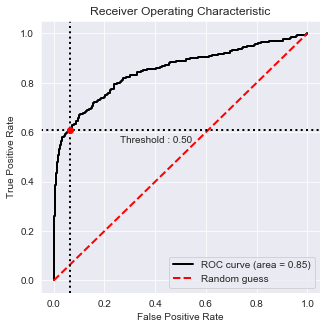

In [44]:
get_metrics(y_hat_arst_lr, y_test_arstmade, y_hat_arst_lr_proba)

+ De estas metricas podemos decir que este modelo capta de mejor manera cuando una persona No es arrestada vs que cuando Si es arrestada, pero no por una gran diferencia. Esto se puede apreciar en el recall 0.93 > 0.63
+ Este 0.63 no esta diciendo que nuestro modelo para esta clase (individuo arrestado) predice mejor que un clasificador aleatorio (0.63 > 0.5).

+ Del grafico podemos ver la recta negra esta por encima de la roja, esto nos dice que nuestro modelo en general es mejor que un clasificador aleatorio. Todo el area dentro de la curva puede interpretarse como la probabilidad de que ante un par de individuos, uno arrestado y el otro no arrestado, la prueba los clasifique correctamente.

+ Mejores parametros de la grilla:

In [46]:
lr_model_arst_grid_cv.best_params_

{'C': 0.1, 'penalty': 'l2'}

#### Refinando atributos más importantes para el mejor modelo.

**Mejor Modelo**

De los 3 modelos planteados, consideramos que el que mejor desempeña es Random Forest.


Esto debido a que dentro de estos modelos, algunos no captan de una buena manera si efectivamente se hizo el arresto (Verdadero negativo), pero estos también captan de manera eficiente si NO se hizo el arresto (Verdadero positivo). Es decir el recall para la clase 1 no es tan alto en algunos los modelos, pero para todos si es alto el recall para la clase 0.

**Importancia atributos**

Para poder saber cuales son mis atributos más importantes, hacemos un grafico con los coeficientes de cada atributo de la regresión (valores de los betas). Esto lo hacemos para saber cuales son los atributos que afectan de mayor manera mi vector objetivo.

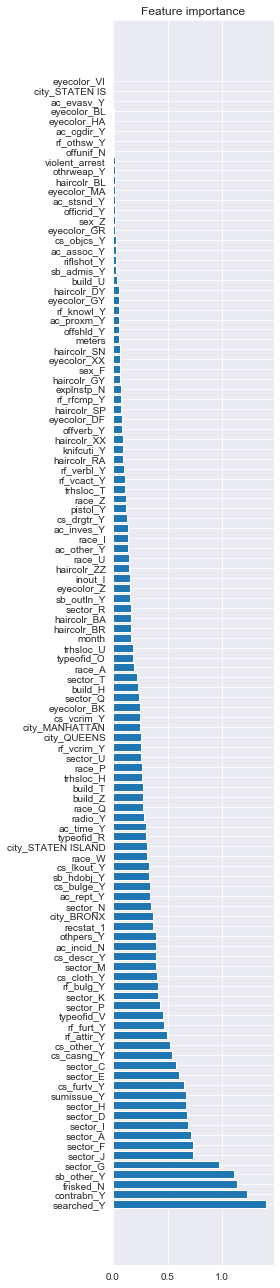

In [49]:
# Graficando coeficientes de los atributos y los nombres de los atributos.
plt.figure(figsize=(4,18))
plot_importance(lr_model_arst_grid_cv.best_estimator_, X_train_arstmade.columns)
plt.tight_layout()

+ Podemos decir que los atributos searched_Y, contrabn_Y, frisked_N, sb_other_Y y sector_G son los atributos con coeficientes más alto de la regresión. Procederemos a entrenar nuestro modelo a elección, con mejor desempeño, en estos atributos.

In [50]:
# Creando nueva data de entrenamiento en base a los atributos importantes y estandarizando esta data para que esten las columnas en una misma escala
X_SMOTE_arst_bestf = X_SMOTE_arst.loc[:, ['searched_Y','contrabn_Y','frisked_N','sb_other_Y', 'sector_G' ]]
X_SMOTE_arst_bestf_scaled = scaler.fit_transform(X_SMOTE_arst_bestf)

### 5.1.4 Random Forest.
- El mejor modelo anterior vino dado por la grilla {'max_features': 'log2', 'n_estimators': 670} 
- Modelo entrenado con los 5 atributos más importantes.

In [51]:
# Entrenando modelo
random_forest_arst_bf = RandomForestClassifier(max_features= 'log2', n_estimators=670, random_state = 37311, n_jobs=-1)
random_forest_arst_bf.fit(X_SMOTE_arst_bestf_scaled, y_SMOTE_arst)

RandomForestClassifier(max_features='log2', n_estimators=670, n_jobs=-1,
                       random_state=37311)

In [52]:
# Haciendo la prediccion normal y la de probabilidades
y_hat_arst_rf_bestf = random_forest_arst_bf.predict(X_test_arstmade.loc[:,['searched_Y','contrabn_Y','frisked_N','sb_other_Y', 'sector_G' ]])
y_hat_arst_rf_bestf_prob = random_forest_arst_bf.predict_proba(X_test_arstmade.loc[:,['searched_Y','contrabn_Y','frisked_N','sb_other_Y', 'sector_G' ]])[::,1]

##### Metricas: Reporte de clasificación, matriz de confusión y curva ROC.

[[4229  209]
 [ 108  201]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      4438
           1       0.49      0.65      0.56       309

    accuracy                           0.93      4747
   macro avg       0.73      0.80      0.76      4747
weighted avg       0.94      0.93      0.94      4747



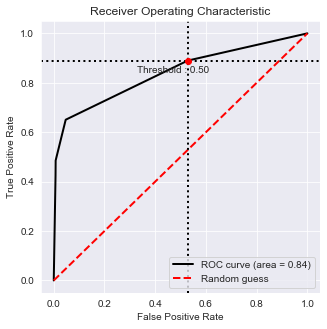

In [53]:
get_metrics(y_hat_arst_rf_bestf, y_test_arstmade, y_hat_arst_rf_bestf_prob)

+ De estas metricas podemos decir que este modelo capta de mejor manera cuando una persona NO es arrestada vs que cuando es arrestada, visto en el recall.
+ A diferencia del modelo saturado pasado, este bajo un poco en el recall de la clase 1, pero subio la precision, f1-score y el accuracy.

+ Del grafico podemos ver la recta negra esta por encima de la roja, esto nos dice que nuestro modelo en general es mejor que un clasificador aleatorio. Todo el area dentro de la curva puede interpretarse como la probabilidad de que ante un par de individuos, uno arrestado y el otro no arrestado, la prueba los clasifique correctamente.

#### Comparación desempeño de modelos I:

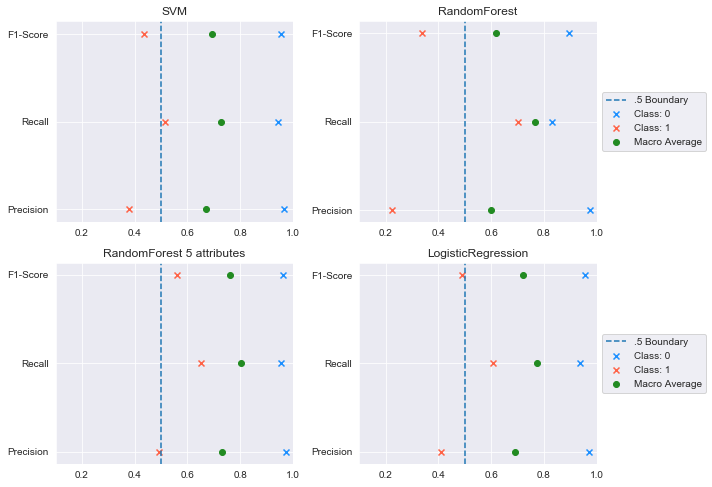

In [76]:
estimators = ([('SVM', svm_model_grid_cv.best_estimator_ ),('RandomForest',
random_forest_grid_cv.best_estimator_),('RandomForest 5 attributes',
random_forest_arst_bf),('LogisticRegression',lr_model_arst_grid_cv)])

plt.figure(figsize=(10,10))
for index, value in enumerate(estimators):
    plt.subplot(3, 2,  index + 1)
    plt.title(value[0]) 
    if index != 2:
        class_pred = value[1].predict(X_test_arstmade) 
    else:
        class_pred = value[1].predict(X_test_arstmade.loc[:,['searched_Y','contrabn_Y','frisked_N','sb_other_Y', 'sector_G' ]])
    
    afx.plot_classification_report(y_test_arstmade, class_pred, dummy_class=True)
    plt.xlim((0.1, 1.0))
    if (index + 1) % 2 == 0:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
    plt.tight_layout()

+ De esta comparación visual de las metricas de todos los modelos, podemos notar que el modelo que mejor desempeñó fue el modelo RandomForrest entrenado con los 5 atributos más importantes en nuestro vector objetivo, esto ya que posee resultados más parejos para cada clase, visto en el macro average.
+ El peor que desempeñó fue la maquina de soporte vectorial, debido al mal desempeño para reconocer la clase 1 y quedando con f1-score debajo del 0.5. 

------

##### Modelación para predecir si determinado procedimiento policial concluye en vicolencia o no.

+ Entrenaremos 5 modelos con busqueda en grilla de hiperparametros para determinar si el procedimiento policial concluye en una accion violenta o no. Finalmente compararemos el desempeño de estos.

### 5.2.1 RandomForest.

+ Grilla viene definida por:


{**max_depth**:[1,6,10,14],**max_features**: [None, 'log2', 'sqrt'],**n_estimators**:list(range(20,1001,50))}

In [56]:
random_forest_grid_cv_v = GridSearchCV(RandomForestClassifier(random_state = 37311), {'max_depth':[1,6,10,14],'max_features': [None, 'log2', 'sqrt'],'n_estimators':list(range(20,1001,50))},cv=2,n_jobs=-1).fit(X_SMOTE_vlnt_scaled, y_SMOTE_vlnt)

##### Metricas: Matriz de confusión, reporte de clasificación y curva ROC.


[[2245 1394]
 [ 199  909]]
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      3639
           1       0.39      0.82      0.53      1108

    accuracy                           0.66      4747
   macro avg       0.66      0.72      0.64      4747
weighted avg       0.80      0.66      0.69      4747



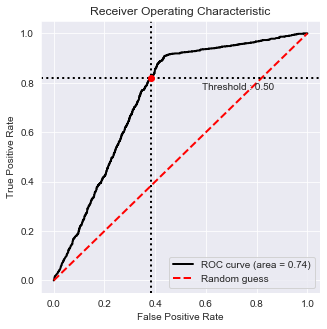

In [57]:
y_hat_vlnt_rf = random_forest_grid_cv_v.best_estimator_.predict(X_test_violent)
y_hat_vlnt_rf_proba = random_forest_grid_cv_v.predict_proba(X_test_violent)[::,1]
get_metrics(y_hat_vlnt_rf, y_test_violent, y_hat_vlnt_rf_proba)

+ De estas metricas podemos decir que este modelo capta de mejor manera cuando  el procedimiento policial concluyó en una acción violenta vs que cuando No. Esto se puede apreciar en el recall 0.82 > 0.62
+ Este 0.82 no esta diciendo que nuestro modelo para esta clase (procedimiento violento) predice mejor que un clasificador aleatorio (0.70 > 0.5).


+ Del grafico podemos ver la recta negra esta por encima de la roja, esto nos dice que nuestro modelo en general es mejor que un clasificador aleatorio. Todo el area dentro de la curva puede interpretarse como la probabilidad de que ante un procedimiento policial, donde uno de estos concluya en violencia y el otro no, la prueba los clasifique correctamente.

+ Mejores hiperparametros que se encontrarón con la busqueda de grilla:

In [72]:
random_forest_grid_cv_v.best_params_

{'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 20}

### 5.2.2 SVM.


+ Definiendo grilla.


In [58]:
C =  [0.01, 0.1, 1, 10]
gamma = [0.0001, 0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf']
cross_val_n = 2
param_dict = {'C':C,'gamma':gamma, 'kernel': kernel}

{**C**: [0.01, 0.1, 1, 10], **gamma**:[0.0001, 0.001, 0.01, 0.1, 1], **kernel** : ['linear', 'rbf']}

In [59]:
svm_model_grid_cv_v = GridSearchCV(estimator=SVC(probability=True), param_grid= param_dict, cv=cross_val_n, n_jobs=-1)
svm_model_grid_cv_v.fit(X_SMOTE_vlnt_scaled, y_SMOTE_vlnt)

GridSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

##### Metricas: Matriz de confusión, reporte de clasificación y curva ROC.

[[3193  446]
 [ 936  172]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      3639
           1       0.28      0.16      0.20      1108

    accuracy                           0.71      4747
   macro avg       0.53      0.52      0.51      4747
weighted avg       0.66      0.71      0.68      4747



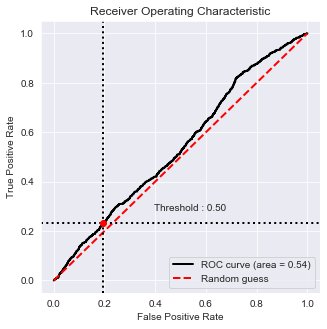

In [60]:
y_hat_vlnt_svm = svm_model_grid_cv_v.best_estimator_.predict(X_test_violent)
y_hat_vlnt_svm_proba = svm_model_grid_cv_v.best_estimator_.predict_proba(X_test_violent)[::,1]
get_metrics(y_hat_vlnt_svm, y_test_violent, y_hat_vlnt_svm_proba)

+ De estas metricas podemos decir que este modelo capta de mejor manera cuando  el procedimiento policial no concluye en una acción violenta vs que cuando Si. Esto se puede apreciar en el recall 0.88 > 0.16.
+ Este 0.88 nos esta diciendo que nuestro modelo para esta clase (procedimiento no violento) predice mejor que un clasificador aleatorio (0.88 > 0.5).


+ Del grafico podemos ver la recta negra esta apenas por encima de la roja, esto nos dice que nuestro modelo en general es un pelo mejor que un clasificador aleatorio. Todo el area dentro de la curva puede interpretarse como la probabilidad de que ante un procedimiento policial, donde uno de estos concluya en violencia y el otro no, la prueba los clasifique correctamente.

+ Mejores hiperparametros que se encontrarón con la busqueda de grilla:

In [ ]:
svm_model_grid_cv_v.best_params_

### 5.2.3 LogisticRegression.

+ Definiendo la grilla y entrenando el modelo:

In [61]:
log_grid_param = {'C':[0.001, 0.01, 0.1, 0.5, 1, 1.5, 2], 'penalty': ['l2','l1', 'elasticnet']}
lr_model_grid_cv_v = GridSearchCV(estimator= LogisticRegression(),param_grid= log_grid_param,cv=2, n_jobs=-1)
lr_model_grid_cv_v.fit(X_SMOTE_vlnt_scaled, y_SMOTE_vlnt)

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2],
                         'penalty': ['l2', 'l1', 'elasticnet']})

+ La grilla viene dada por:


{**C**:[0.001, 0.01, 0.1, 0.5, 1, 1.5, 2], **penalty**: ['l2','l1', 'elasticnet']}

##### Metricas: Matriz de confusión, reporte de clasificación y curva ROC.

[[3639    0]
 [1108    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3639
           1       0.00      0.00      0.00      1108

    accuracy                           0.77      4747
   macro avg       0.38      0.50      0.43      4747
weighted avg       0.59      0.77      0.67      4747



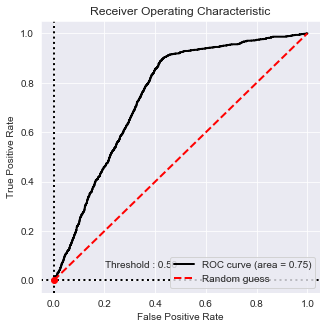

In [62]:
y_hat_vlnt_lr = lr_model_grid_cv_v.best_estimator_.predict(X_test_violent)
y_hat_vlnt_lr_proba = lr_model_grid_cv_v.best_estimator_.predict_proba(X_test_violent)[::,1]
get_metrics(y_hat_vlnt_lr, y_test_violent, y_hat_vlnt_lr_proba)

+ De la matriz de confusión se puede notar que nuestro modelo no clasifico ninguna observacion como procedimiento violento, clasificó todo como procedimiento no violento. Por esta razon se aprecia los ceros en la matriz en el lado izquierdo. También el recall como es 0, nos esta diciendo que este modelo no acertó en clasificar el procedimiento como violento en ninguna observación.



+ Del grafico podemos ver que la recta negra esta por encima de la recta roja, haciendo una falsa ilusión de que nuestro modelo desempeña eficientemente, esto es debido a la ponderacion final entre las metricas para la clase 0 y la 1.

+ Mejores hiperparametros que se encontrarón con la busqueda de grilla:

In [73]:
lr_model_grid_cv_v.best_params_

{'C': 0.01, 'penalty': 'l2'}

### 5.2.4 XGBoost.

+ Definiendo grilla de hiperparametros:

In [63]:
xg_param_grid = { 'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,'max_depth': [ 3, 4, 5, 6],'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], 'n_estimators': [50,70,80,90]}

+ Grilla viene dada por:

{**learning_rate**: [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,**max_depth**: [ 3, 4, 5, 6],**gamma**: [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], **n_estimators**: [50,70,80,90]}

In [65]:
xg_boost_grid_cv_v = GridSearchCV(estimator= XGBClassifier(),param_grid= xg_param_grid,cv=2, n_jobs=-1)
xg_boost_grid_cv_v.fit(X_SMOTE_vlnt_scaled, y_SMOTE_vlnt)

[18:40:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

##### Metricas: Matriz de confusión, reporte de clasificación y curva ROC.

[[2069 1570]
 [ 116  992]]
              precision    recall  f1-score   support

           0       0.95      0.57      0.71      3639
           1       0.39      0.90      0.54      1108

    accuracy                           0.64      4747
   macro avg       0.67      0.73      0.63      4747
weighted avg       0.82      0.64      0.67      4747



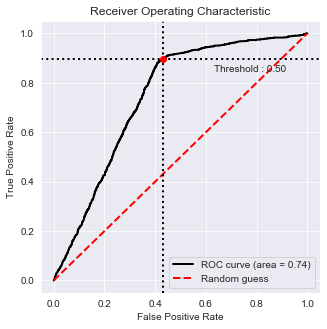

In [66]:
y_hat_vlnt_xg = xg_boost_grid_cv_v.best_estimator_.predict(X_test_violent)
y_hat_vlnt_xg_proba = xg_boost_grid_cv_v.best_estimator_.predict_proba(X_test_violent)[::,1]
get_metrics(y_hat_vlnt_xg, y_test_violent, y_hat_vlnt_xg_proba)

+ De estas metricas podemos decir que este modelo capta de mejor manera cuando  el procedimiento policial concluye en una acción violenta vs que cuando No. Esto se puede apreciar en el recall 0.90 > 0.57.
+ Este 0.90 nos esta diciendo que nuestro modelo para esta clase (procedimiento  violento) predice mejor que un clasificador aleatorio (0.90 > 0.5).


+ Del grafico podemos ver la recta negra esta por encima de la roja, esto nos dice que nuestro modelo en general es mejor que un clasificador aleatorio. Todo el area dentro de la curva puede interpretarse como la probabilidad de que ante un procedimiento policial, donde uno de estos concluya en violencia y el otro no, la prueba los clasifique correctamente.

+ Mejores hiperparametros que se encontrarón con la busqueda de grilla:

In [74]:
xg_boost_grid_cv_v.best_params_

{'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 90}

### 5.2.5 Naive Bayes.

+ Dada la naturaleza binaria del vector objetivo se usó BernoulliNB con una busqueda de hiperparametros.

+ Definiendo grilla:

In [67]:
nv_param_grid = {'alpha':[0.001, 0.01, 0.1, 0.5, 1.0, 2], 'fit_prior': [True, False]}

{**alpha**:[0.001, 0.01, 0.1, 0.5, 1.0, 2], **fit_prior**: [True, False]}

In [68]:
nb_model_grid_cv_v = GridSearchCV(estimator=BernoulliNB(), param_grid = nv_param_grid, cv=2, n_jobs=-1)
nb_model_grid_cv_v.fit(X_SMOTE_vlnt_scaled, y_SMOTE_vlnt)

GridSearchCV(cv=2, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2],
                         'fit_prior': [True, False]})

###### Metricas: Matriz de confusión, reporte de clasificación y curva ROC.

[[2597 1042]
 [ 392  716]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      3639
           1       0.41      0.65      0.50      1108

    accuracy                           0.70      4747
   macro avg       0.64      0.68      0.64      4747
weighted avg       0.76      0.70      0.72      4747



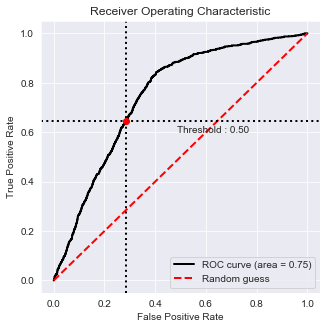

In [69]:
y_hat_vlnt_nb = nb_model_grid_cv_v.best_estimator_.predict(X_test_violent)
y_hat_vlnt_nb_proba = nb_model_grid_cv_v.best_estimator_.predict_proba(X_test_violent)[::,1]
get_metrics(y_hat_vlnt_nb, y_test_violent, y_hat_vlnt_nb_proba)

+ De estas metricas podemos decir que este modelo capta de mejor manera cuando el procedimiento policial no concluye en violencia vs que cuando concluye con violencia. Esto se puede apreciar en el recall 0.71 > 0.65
+ Este 0.71 no esta diciendo que nuestro modelo para esta clase (procedimiento no violento) predice mejor que un clasificador aleatorio (0.71 > 0.5).


+ Del grafico podemos ver la recta negra esta por encima de la roja, esto nos dice que nuestro modelo en general es mejor que un clasificador aleatorio. Todo el area dentro de la curva puede interpretarse como la probabilidad de que ante un par de individuos, uno arrestado y el otro no arrestado, la prueba los clasifique correctamente.

+ Mejores hiperparametros que se encontrarón con la busqueda de grilla:

In [75]:
nb_model_grid_cv_v.best_params_

{'alpha': 2, 'fit_prior': True}

#### Comparación desempeño de modelos II:

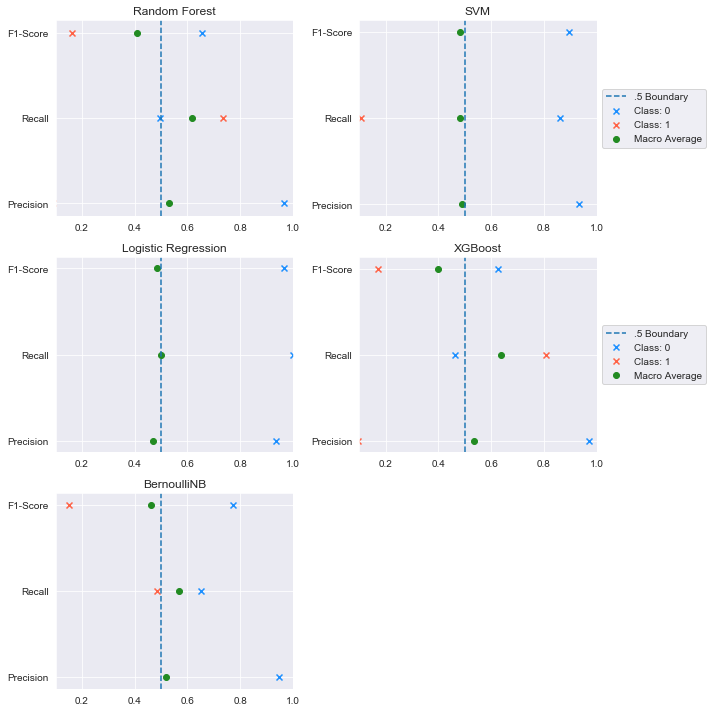

In [70]:
estimators = ([('Random Forest', random_forest_grid_cv_v.best_estimator_ ),('SVM',
svm_model_grid_cv_v.best_estimator_),('Logistic Regression',lr_model_grid_cv_v.best_estimator_),
               ('XGBoost',xg_boost_grid_cv_v.best_estimator_), ('BernoulliNB', nb_model_grid_cv_v.best_estimator_)])


plt.figure(figsize=(10,10))
for index, value in enumerate(estimators):
    plt.subplot(3, 2,  index + 1)
    plt.title(value[0]) 
    class_pred = value[1].predict(X_test_arstmade) 
    afx.plot_classification_report(y_test_arstmade, class_pred, dummy_class=True)
    plt.xlim((0.1, 1.0))
    if (index + 1) % 2 == 0:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
    plt.tight_layout()

+ De estos graficos podemos ver que el los modelos XGBoost y RandomForrest obtuvieron metricas bastante similares, siendo estos mejores para predecir actos violentos vs no violentos. 
+ De los modelos que peor desempeñarón tenemos la regresion logistica y la maquina de soporte de vectores. Se puede notar que estos captan de manera ineficiente si el procedimiento concluye en arresto. Podemos ver que el recall para esta clase casi no se aparece en el grafico.

### Exportando nuestros mejores dos modelos.

+ Los modelos elegidos para exportar son los siguientes:
    - Modelo 1: RandomForrest con los mejores 5 atributos.
    
    (este modelo fue entrenado para predecir si el procedimiento concluye en arresto o no.)
    - Modelo 2: XGBClassifier saturado.
    
    (este modelo fue entrenado para predecir si el procedimiento concluye en violencia o no.)

In [77]:
pickle.dump(random_forest_arst_bf,open('grupo_sebastian_ivan_modelo-1.sav','wb'))
pickle.dump(xg_boost_grid_cv_v.best_estimator_,open('grupo_sebastian_ivan_modelo-2.sav','wb'))